In [4]:
import geopandas as gpd
import pandas as pd

shapefile_path = '../data/shape_data/macrozona_tnf.shp'
gdf_mcrz = gpd.read_file(shapefile_path)
gdf_mcrz = gdf_mcrz.to_crs(crs="EPSG:4326") #CRS Geográfico(latitud y longitud)
gdf_mcrz = gdf_mcrz[["MUNICIPIO","geometry"]]
gdf_mcrz

MUNICIPIO  \
0      Santa Cruz de Tenerife   
1                Rosario (El)   
2                 Laguna (La)   
3                    Tegueste   
4   Victoria de Acentejo (La)   
5              Realejos (Los)   
6       San Juan de la Rambla   
7          Santiago del Teide   
8         San Miguel de Abona   
9                       Arico   
10                     Guimar   

                                             geometry  
0   POLYGON ((-16.13855 28.52774, -16.13854 28.527...  
1   POLYGON ((-16.29239 28.42703, -16.29234 28.426...  
2   POLYGON ((-16.2806 28.46876, -16.28041 28.4687...  
3   MULTIPOLYGON (((-16.2787 28.53284, -16.27883 2...  
4   POLYGON ((-16.3729 28.47351, -16.37288 28.4733...  
5   POLYGON ((-16.47015 28.37775, -16.46996 28.377...  
6   POLYGON ((-16.60798 28.30665, -16.62157 28.303...  
7   POLYGON ((-16.67942 28.15529, -16.67938 28.155...  
8   POLYGON ((-16.49677 28.07844, -16.49688 28.078...  
9   POLYGON ((-16.4231 28.19357, -16.42316 28.1935...  
10  POLYGON ((-16.35114 28.38555, -16.35119 28.385...

In [5]:
import numpy as np

# Añadimos viajes de generación y atracción entre macrozonas
num_zonas = len(gdf_mcrz)
porcentaje_principales = 0.1
viajes_totales_generacion = 50000 
viajes_totales_atraccion = 50000

# Generar vectores de generación y atracción de viajes
np.random.seed(250)
generacion = np.random.exponential(scale=100, size=num_zonas)  # Distribución exponencial para generación
atraccion = np.random.exponential(scale=100, size=num_zonas)   # Distribución exponencial para atracción

# Aumentar los valores de las zonas principales
num_principales = int(num_zonas * porcentaje_principales)
generacion[:num_principales] *= 10  # Multiplicamos los valores de las zonas principales
atraccion[:num_principales] *= 10

# Normalizar para asegurar que las sumas sean iguales a los totales
generacion = generacion / generacion.sum() * viajes_totales_generacion
atraccion = atraccion / atraccion.sum() * viajes_totales_atraccion

# Asignar los valores de generación y atracción al DataFrame
gdf_mcrz['viajes_generacion'] = generacion
gdf_mcrz['viajes_atraccion'] = atraccion
gdf_mcrz

MUNICIPIO  \
0      Santa Cruz de Tenerife   
1                Rosario (El)   
2                 Laguna (La)   
3                    Tegueste   
4   Victoria de Acentejo (La)   
5              Realejos (Los)   
6       San Juan de la Rambla   
7          Santiago del Teide   
8         San Miguel de Abona   
9                       Arico   
10                     Guimar   

                                             geometry  viajes_generacion  \
0   POLYGON ((-16.13855 28.52774, -16.13854 28.527...       11098.061076   
1   POLYGON ((-16.29239 28.42703, -16.29234 28.426...        1461.284814   
2   POLYGON ((-16.2806 28.46876, -16.28041 28.4687...        2029.394865   
3   MULTIPOLYGON (((-16.2787 28.53284, -16.27883 2...        4424.575619   
4   POLYGON ((-16.3729 28.47351, -16.37288 28.4733...        4706.456435   
5   POLYGON ((-16.47015 28.37775, -16.46996 28.377...        5745.814424   
6   POLYGON ((-16.60798 28.30665, -16.62157 28.303...        3984.774569   
7   POLYGON ((-16.67942 28.15529, -16.67938 28.155...        1864.958337   
8   POLYGON ((-16.49677 28.07844, -16.49688 28.078...        6809.956383   
9   POLYGON ((-16.4231 28.19357, -16.42316 28.1935...        4643.246430   
10  POLYGON ((-16.35114 28.38555, -16.35119 28.385...        3231.477048   

    viajes_atraccion  
0        3765.649391  
1         975.894114  
2        3508.582216  
3         526.272165  
4        6255.578427  
5        1977.441695  
6        9447.592999  
7         418.063295  
8        3007.426128  
9        3771.919495  
10      16345.580074

In [14]:
gdf_mcrz.explore(
    column= "viajes_generacion",
    tooltip= "viajes_generacion",
    popup=True,
    tiles="CartoDB positron",
    cmap = "Blues",
)

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Mapa croroplético representado con matplotlib 
def plot_enhanced_choropleth(gdf, column, title, cmap='YlOrRd', figsize=(12, 6), fontsize=12):
    """
    Genera un mapa coroplético mejorado con texto dentro de las zonas y una barra de color personalizada.

    :param gdf: GeoDataFrame con los datos.
    :param column: Columna a visualizar (ej. 'viajes_generacion' o 'viajes_atraccion').
    :param title: Título principal del mapa.
    :param cmap: Colormap de matplotlib (default: 'YlOrRd').
    :param figsize: Tamaño de la figura.
    :param fontsize: Tamaño de fuente para el título y etiquetas.
    """
    # Crear la figura y los ejes
    fig, ax = plt.subplots(1, figsize=figsize)

    # Graficar el mapa coroplético
    gdf.plot(
        column=column, 
        cmap=cmap, 
        linewidth=0.5, 
        edgecolor='0.8', 
        legend=True, 
        ax=ax
    )

    # Agregar texto dentro de cada polígono
    for idx, row in gdf.iterrows():
        centroid = row['geometry'].centroid
        if not centroid.is_empty:
            ax.text(
                centroid.x, 
                centroid.y, 
                f"{row[column]:.0f}", 
                ha='center', 
                va='center', 
                fontsize=fontsize - 4, 
                color='black'
            )

    # Añadir título y subtítulo
    ax.set_title(title, fontdict={'fontsize': fontsize + 4, 'fontweight': 'bold'}, pad=20)

    # Eliminar ejes
    ax.axis('off')

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

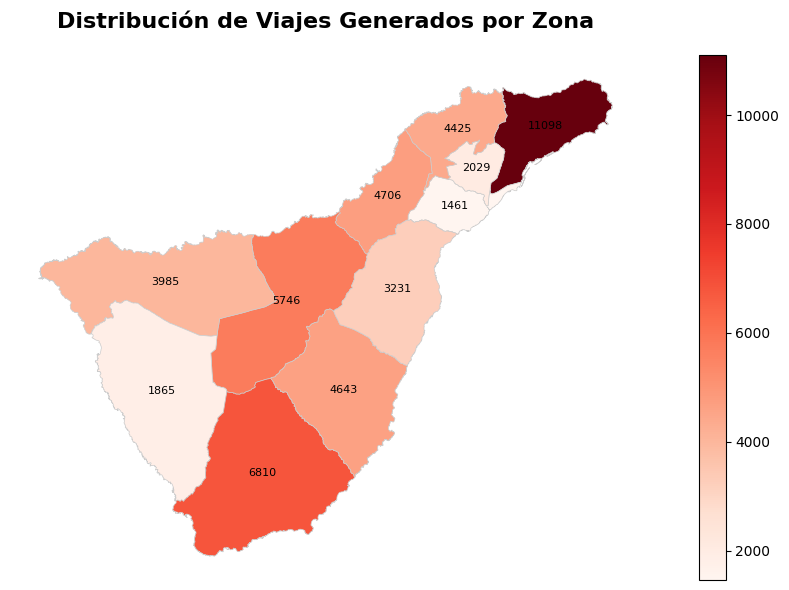

In [13]:
plot_enhanced_choropleth(
    gdf_mcrz, 
    column='viajes_generacion', 
    title='Distribución de Viajes Generados por Zona',
    cmap='Reds'
)

In [9]:
import folium
from folium import Choropleth, GeoJson, LayerControl
import json
from shapely.ops import unary_union  # Para el cálculo del centroide
import branca.colormap as cm

# Mapa croroplético representado con Follium 
def plot_interactive_choropleth_viajes(gdf, column, title, cmap='YlOrRd', tiles='CartoDB Positron'):
    """
    Genera un mapa coroplético interactivo específico para la generación de viajes.

    :param gdf: GeoDataFrame con los datos.
    :param column: Columna a visualizar (default: 'viajes_generacion').
    :param title: Título principal del mapa.
    :param cmap: Colormap de matplotlib (default: 'YlOrRd').
    :param tiles: Tipo de mapa de fondo (default: 'CartoDB Positron').
    """
    # Asegurarse de que el GeoDataFrame esté en EPSG:4326 (coordenadas de longitud y latitud)
    gdf = gdf.to_crs(epsg=4326)

    # Convertir el GeoDataFrame a formato GeoJSON para poder pasarselo como capa a Follium
    gdf_json = json.loads(gdf.to_json())

    # Calcular el centroide de todos los polígonos usando union_all()
    all_geoms = gdf.geometry.tolist()
    union_geom = unary_union(all_geoms)
    centroid = union_geom.centroid

    # Definir atribución para diferentes proveedores de tiles. Necesario para cargar los mapas
    tile_providers = {
        'OpenStreetMap': {'tiles': 'OpenStreetMap', 'attr': 'Map data © OpenStreetMap contributors'},
        'CartoDB Positron': {'tiles': 'CartoDB Positron', 'attr': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>'},
        'Stamen Terrain': {'tiles': 'Stamen Terrain', 'attr': 'Map tiles by <a href="http://stamen.com">Stamen Design</a>, under <a href="http://creativecommons.org/licenses/by/3.0">CC BY 3.0</a>. Data by <a href="http://openstreetmap.org">OpenStreetMap</a>, under <a href="http://www.openstreetmap.org/copyright">ODbL</a>.'}
    }

    # Obtener los detalles del proveedor de tiles seleccionado
    if tiles in tile_providers:
        tile_info = tile_providers[tiles]
        tiles_url = tile_info['tiles']
        attr = tile_info['attr']
    else:
        raise ValueError(f"Proveedor de tiles no soportado: {tiles}")

    # Crear un mapa centrado en la región de interés
    m = folium.Map(
        location=[centroid.y, centroid.x], 
        zoom_start=10, 
        tiles=tiles_url,
        attr=attr,  # Atribución requerida
        control_scale=True
    )

    # Agregar el mapa coroplético
    choropleth = folium.Choropleth(
        geo_data=gdf_json,
        name="choropleth",
        data=gdf,
        columns=["MUNICIPIO", column],
        key_on="feature.properties.MUNICIPIO",  # Asegúrate de que "MUNICIPIO" sea la clave correcta
        fill_color=cmap,
        fill_opacity=0.7,
        line_opacity=0.5,
        legend_name=f"{title}",
        highlight=True,
        nan_fill_color="lightgray",  # Color para valores NaN
        nan_fill_opacity=0.5
    ).add_to(m)

    # Agregar etiquetas de texto dentro de cada zona
    for _, row in gdf.iterrows():
        centroid = row['geometry'].centroid
        if not centroid.is_empty:
            folium.Marker(
                location=[centroid.y, centroid.x],
                icon=folium.DivIcon(
                    icon_size=(150, 36),
                    icon_anchor=(0, 0),
                    html=f"<div style='font-size: 10pt; color: black;'>{row[column]:.0f}</div>"
                )
            ).add_to(m)

    # Agregar control de capas
    LayerControl().add_to(m)

    # Mostrar el mapa
    return m

In [10]:
# Ejemplo de uso
interactive_map = plot_interactive_choropleth_viajes(
    gdf=gdf_mcrz, 
    column='viajes_generacion', 
    title='Generación de Viajes',
    cmap='Reds',
    tiles='CartoDB Positron'  # Otras opciones: 'OpenStreetMap', 'CartoDB Positron'
)
interactive_map